## Optimizing Predictive Model

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading the data

In [5]:
data = pd.read_csv(r"C:\Users\navee\Downloads\Medicare_Physician_data.csv")
data.head()

C:\Users\navee\AppData\Local\Temp\ipykernel_28256\1838197172.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\navee\Downloads\Medicare_Physician_data.csv")


,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
0,1699240721,Rickman,Sandra,A,FNP-C,F,I,1501 10th St,NaN,Alamogordo,...,0.21,0.26,0.68,0.62,0.37,0.10,0.46,NaN,NaN,1.0599
1,1437312147,Gonzalez,Andrea,C,MD,F,I,1140 S Knoxville Ave Ste A,NaN,Saint Marys,...,0.17,0.14,0.56,0.52,0.18,0.15,0.42,NaN,NaN,0.7717
2,1720298136,Okoronkwo,Blessing,N,M.D.,F,I,29001 Harper Ave,NaN,Saint Clair Shores,...,0.31,0.63,0.75,0.75,0.71,0.08,0.49,0.06,0.16,4.1384
3,1538172796,Virnelson,Tonia,NaN,P.T.,F,I,2004 Sproul Rd Ste 100,NaN,Broomall,...,0.13,0.25,0.68,0.56,0.30,0.16,0.73,NaN,NaN,0.9132
4,1225019458,Pastore,Pamela,B,N.P.,F,I,500 N Columbia River Hwy,NaN,Saint Helens,...,0.19,0.30,0.43,0.57,0.13,NaN,0.36,0.00,NaN,0.9603


## Data Structures

In [6]:
data.shape

(100000, 73)

In [7]:
data.columns

Index(['Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
       'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Sprsn_Ind',
       'Drug_Tot_HCPCS_Cds', 'Drug_Tot_Benes', 'Drug_Tot_Srvcs',
       'Drug_Sbmtd_Chrg', 'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt',
       'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds',
       'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg',
       'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt',
       'Bene_Avg_Age', 'Bene_Age_LT_65_

In [8]:
data.describe()

,Rndrng_NPI,Rndrng_Prvdr_RUCA,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,Tot_Mdcr_Stdzd_Amt,Drug_Tot_HCPCS_Cds,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
count,1.000000e+05,99931.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,88395.000000,...,84012.000000,84216.000000,92644.000000,94298.000000,84197.000000,63134.000000,89644.000000,42339.000000,52785.000000,100000.000000
mean,1.498002e+09,1.607645,28.081150,3.461169e+02,2.571226e+03,3.530827e+05,1.138245e+05,9.024254e+04,8.803128e+04,1.568279,...,0.316596,0.353700,0.612865,0.665418,0.396109,0.113062,0.478274,0.070054,0.090570,1.552395
std,2.865615e+08,3.302289,30.123688,5.754904e+03,2.964898e+04,3.201410e+06,6.137373e+05,5.479541e+05,5.138049e+05,5.315235,...,0.151540,0.131976,0.128804,0.115652,0.156763,0.059841,0.136086,0.133094,0.090655,0.778916
min,1.003001e+09,1.000000,1.000000,1.100000e+01,1.100000e+01,1.041400e+02,3.300000e+01,2.155000e+01,1.915000e+01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369600
25%,1.245876e+09,1.000000,9.000000,5.800000e+01,1.670000e+02,3.490167e+04,1.406269e+04,1.081291e+04,1.068746e+04,0.000000,...,0.210000,0.260000,0.540000,0.610000,0.280000,0.080000,0.390000,0.000000,0.030000,1.014400
50%,1.497766e+09,1.000000,18.000000,1.500000e+02,4.800000e+02,1.070226e+05,3.851264e+04,3.011169e+04,2.977350e+04,0.000000,...,0.290000,0.340000,0.640000,0.720000,0.370000,0.110000,0.470000,0.030000,0.070000,1.332500
75%,1.740503e+09,1.000000,37.000000,3.360000e+02,1.361000e+03,2.902488e+05,9.507471e+04,7.442445e+04,7.281635e+04,0.000000,...,0.380000,0.430000,0.720000,0.750000,0.500000,0.140000,0.560000,0.070000,0.130000,1.898925
max,1.992999e+09,99.000000,694.000000,1.606407e+06,3.682000e+06,8.686419e+08,1.003779e+08,1.003779e+08,9.753779e+07,135.000000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,10.453300


In [9]:
data.info

<bound method DataFrame.info of        Rndrng_NPI Rndrng_Prvdr_Last_Org_Name Rndrng_Prvdr_First_Name  \
0      1699240721                    Rickman                  Sandra   
1      1437312147                   Gonzalez                  Andrea   
2      1720298136                  Okoronkwo                Blessing   
3      1538172796                  Virnelson                   Tonia   
4      1225019458                    Pastore                  Pamela   
...           ...                        ...                     ...   
99995  1093783532                   Salvucci                  Thomas   
99996  1770054819                      Flynn                    Ryan   
99997  1538241229                    Pranger                  Andrea   
99998  1548767601                     Kolkin               Alexander   
99999  1669793055                      Mundi                Prabhjot   

      Rndrng_Prvdr_MI Rndrng_Prvdr_Crdntls Rndrng_Prvdr_Gndr  \
0                   A                FN

In [10]:
data.isnull().sum()    ##Missing values

Rndrng_NPI                        0
Rndrng_Prvdr_Last_Org_Name        0
Rndrng_Prvdr_First_Name        5356
Rndrng_Prvdr_MI               36218
Rndrng_Prvdr_Crdntls          12254
                              ...  
Bene_CC_Opo_Pct               36866
Bene_CC_RAOA_Pct              10356
Bene_CC_Sz_Pct                57661
Bene_CC_Strok_Pct             47215
Bene_Avg_Risk_Scre                0
Length: 73, dtype: int64

In [11]:
# Visualizing the distribution of numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
print("\nNumerical Features:")
print(numerical_features)


Numerical Features:
Index(['Rndrng_NPI', 'Rndrng_Prvdr_RUCA', 'Tot_HCPCS_Cds', 'Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Tot_HCPCS_Cds',
       'Drug_Tot_Benes', 'Drug_Tot_Srvcs', 'Drug_Sbmtd_Chrg',
       'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt', 'Drug_Mdcr_Stdzd_Amt',
       'Med_Tot_HCPCS_Cds', 'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg',
       'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt',
       'Bene_Avg_Age', 'Bene_Age_LT_65_Cnt', 'Bene_Age_65_74_Cnt',
       'Bene_Age_75_84_Cnt', 'Bene_Age_GT_84_Cnt', 'Bene_Feml_Cnt',
       'Bene_Male_Cnt', 'Bene_Race_Wht_Cnt', 'Bene_Race_Black_Cnt',
       'Bene_Race_API_Cnt', 'Bene_Race_Hspnc_Cnt', 'Bene_Race_NatInd_Cnt',
       'Bene_Race_Othr_Cnt', 'Bene_Dual_Cnt', 'Bene_Ndual_Cnt',
       'Bene_CC_AF_Pct', 'Bene_CC_Alzhmr_Pct', 'Bene_CC_Asthma_Pct',
       'Bene_CC_Cncr_Pct', 'Bene_CC_CHF_Pct', 'Bene_CC_CKD_Pct',
       'Be

## Handling missing values

In [12]:
df= pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Select only numeric columns for imputation
numeric_df = df.select_dtypes(include=[np.number])

# Impute missing values with the mean of the column
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Replace the original numeric columns with the imputed columns
df[numeric_df.columns] = numeric_df

# Display the DataFrame after imputation
print("\nDataFrame after Mean Imputation:")
print(df)

Original DataFrame:
       Rndrng_NPI Rndrng_Prvdr_Last_Org_Name Rndrng_Prvdr_First_Name  \
0      1699240721                    Rickman                  Sandra   
1      1437312147                   Gonzalez                  Andrea   
2      1720298136                  Okoronkwo                Blessing   
3      1538172796                  Virnelson                   Tonia   
4      1225019458                    Pastore                  Pamela   
...           ...                        ...                     ...   
99995  1093783532                   Salvucci                  Thomas   
99996  1770054819                      Flynn                    Ryan   
99997  1538241229                    Pranger                  Andrea   
99998  1548767601                     Kolkin               Alexander   
99999  1669793055                      Mundi                Prabhjot   

      Rndrng_Prvdr_MI Rndrng_Prvdr_Crdntls Rndrng_Prvdr_Gndr  \
0                   A                FNP-C         

In [13]:
df= pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Median Imputation
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Perform median imputation
median_imputed_df = numeric_df.fillna(numeric_df.median())

# Replace the original numeric columns with the median-imputed columns
df[median_imputed_df.columns] = median_imputed_df

print("\nDataFrame after Median Imputation:")
print(df)

Original DataFrame:
       Rndrng_NPI Rndrng_Prvdr_Last_Org_Name Rndrng_Prvdr_First_Name  \
0      1699240721                    Rickman                  Sandra   
1      1437312147                   Gonzalez                  Andrea   
2      1720298136                  Okoronkwo                Blessing   
3      1538172796                  Virnelson                   Tonia   
4      1225019458                    Pastore                  Pamela   
...           ...                        ...                     ...   
99995  1093783532                   Salvucci                  Thomas   
99996  1770054819                      Flynn                    Ryan   
99997  1538241229                    Pranger                  Andrea   
99998  1548767601                     Kolkin               Alexander   
99999  1669793055                      Mundi                Prabhjot   

      Rndrng_Prvdr_MI Rndrng_Prvdr_Crdntls Rndrng_Prvdr_Gndr  \
0                   A                FNP-C         

## Visualizations

C:\Users\navee\AppData\Local\Temp\ipykernel_28256\3015487043.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Tot_Mdcr_Alowd_Amt'], shade=True, color='purple', ax=axs[2])


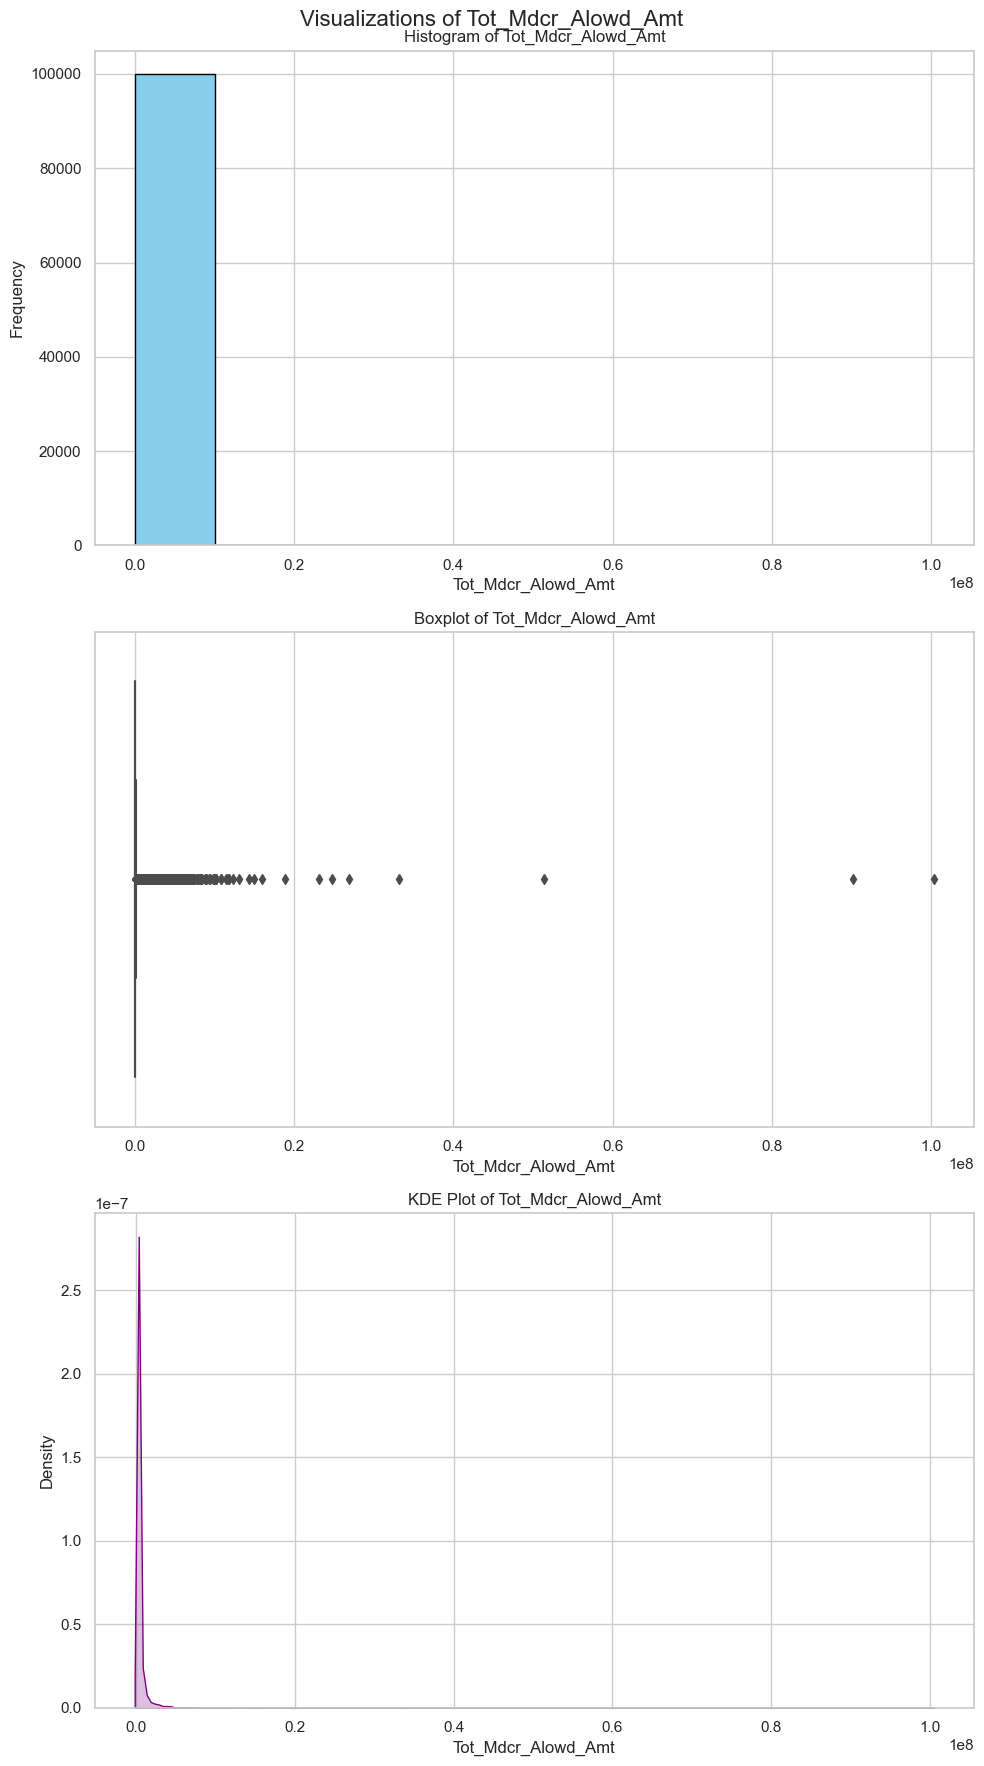

In [16]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(10, 18), tight_layout=True)

# Histogram
axs[0].hist(df['Tot_Mdcr_Alowd_Amt'], bins=10, edgecolor='black', color='skyblue')
axs[0].set_title('Histogram of Tot_Mdcr_Alowd_Amt')
axs[0].set_xlabel('Tot_Mdcr_Alowd_Amt')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['Tot_Mdcr_Alowd_Amt'], color='red', ax=axs[1])
axs[1].set_title('Boxplot of Tot_Mdcr_Alowd_Amt')
axs[1].set_xlabel('Tot_Mdcr_Alowd_Amt')

# KDE Plot
sns.kdeplot(df['Tot_Mdcr_Alowd_Amt'], shade=True, color='purple', ax=axs[2])
axs[2].set_title('KDE Plot of Tot_Mdcr_Alowd_Amt')
axs[2].set_xlabel('Tot_Mdcr_Alowd_Amt')
axs[2].set_ylabel('Density')

# Add overall title
fig.suptitle('Visualizations of Tot_Mdcr_Alowd_Amt', fontsize=16)

plt.show()

## Model building (ML algorithms)

In [17]:
X = data.drop(columns=['Tot_Mdcr_Alowd_Amt'])  # Input features
y = data['Tot_Mdcr_Alowd_Amt']  # Target column

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## 1.SGDRegressor

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

# Assuming X and y are already defined
# X = pd.DataFrame(...)  # Replace with your actual data
# y = pd.Series(...)     # Replace with your actual target values

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert mixed-type columns to string
for col in non_numeric_columns:
    X[col] = X[col].astype(str)

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
        ]), non_numeric_columns),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical values
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), X.select_dtypes(include=['number']).columns)
    ],
    remainder='passthrough'  # Leave the numeric columns unchanged
)

# Define the pipeline with preprocessing and SGDRegressor model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))  # Configure SGDRegressor with some parameters
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Non-numeric columns: Index(['Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
       'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5',
       'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Drug_Sprsn_Ind', 'Med_Sprsn_Ind'],
      dtype='object')
Mean Squared Error: 1.4165441298742975e+20
R-squared Score: -227590258.5704113


## 2.XgBoost Regressor

In [29]:
!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming X and y are already defined
# X = pd.DataFrame(...)  # Replace with your actual data
# y = pd.Series(...)     # Replace with your actual target values

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert mixed-type columns to string
for col in non_numeric_columns:
    X[col] = X[col].astype(str)

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), non_numeric_columns)
    ],
    remainder='passthrough'  # Leave the numeric columns unchanged
)

# Define the pipeline with preprocessing and XGB model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values if needed
    ('model', xgb.XGBRegressor())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Defaulting to user installation because normal site-packages is not writeable
Non-numeric columns: Index(['Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
       'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5',
       'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Drug_Sprsn_Ind', 'Med_Sprsn_Ind'],
      dtype='object')
Mean Squared Error: 352018173293.1132
R-squared Score: 0.4344270274136036


## Comparing both Regressors

Best Model: XGBoost Regressor
Best R-squared Score: 0.4344270274136036
Corresponding Mean Squared Error: 352018173293.1132


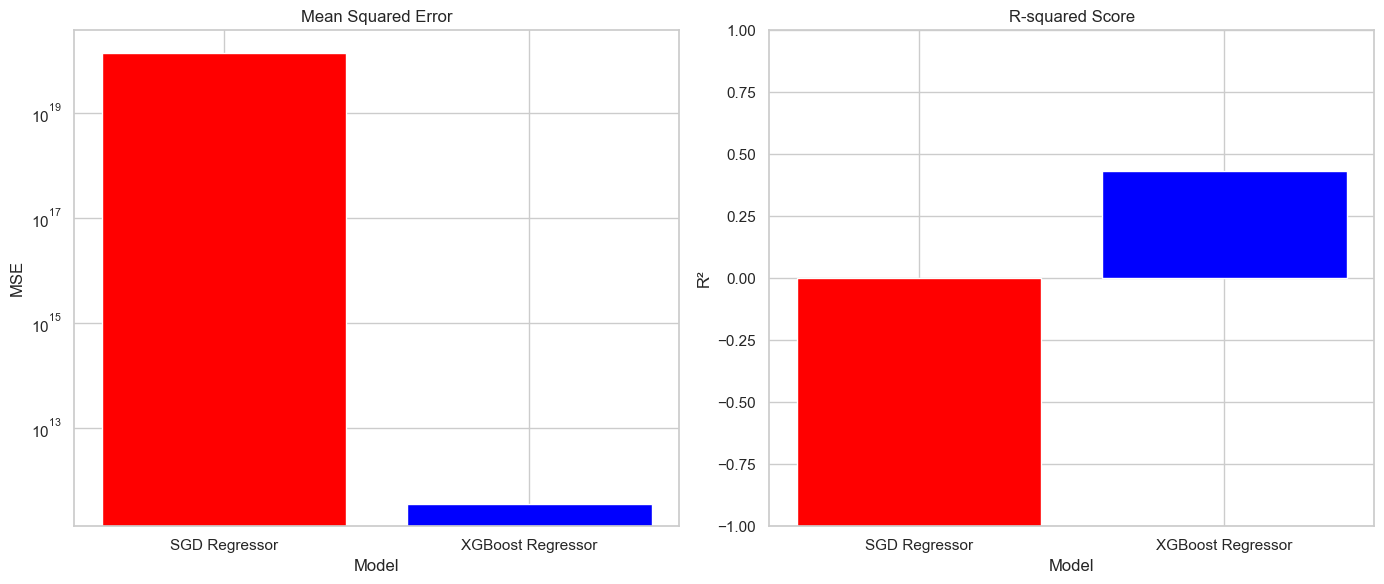

In [72]:
import matplotlib.pyplot as plt

# Results for SGD Regressor
sgd_mse = 1.4165441298742975e+20
sgd_r2 = -227590258.5704113

# Results for XGBoost Regressor
xgb_mse = 352018173293.1132
xgb_r2 = 0.4344270274136036

# Data to plot
models = ['SGD Regressor', 'XGBoost Regressor']
mse_values = [sgd_mse, xgb_mse]
r2_values = [sgd_r2, xgb_r2]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Mean Squared Error
ax1.bar(models, mse_values, color=['red', 'blue'])
ax1.set_title('Mean Squared Error')
ax1.set_yscale('log')  # Use log scale due to large range in values
ax1.set_ylabel('MSE')
ax1.set_xlabel('Model')

# Plot R-squared Score
ax2.bar(models, r2_values, color=['red', 'blue'])
ax2.set_title('R-squared Score')
ax2.set_ylim([-1, 1])  # Set y-axis limits for R² to be in the range of -1 to 1
ax2.set_ylabel('R²')
ax2.set_xlabel('Model')

# Determine the best model based on R-squared score
best_model = 'XGBoost Regressor' if xgb_r2 > sgd_r2 else 'SGD Regressor'
best_r2 = max(xgb_r2, sgd_r2)
best_mse = xgb_mse if best_model == 'XGBoost Regressor' else sgd_mse

# Print the best model and scores
print(f"Best Model: {best_model}")
print(f"Best R-squared Score: {best_r2}")
print(f"Corresponding Mean Squared Error: {best_mse}")

# Display the plots
plt.tight_layout()
plt.show()

# Artificial Neural Network(ANN) 

In [56]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


## 1.ADAM

Training with learning_rate=0.001 and dropout_rate=0.3


C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - loss: 115818.5078 - mae: 115818.5078 - val_loss: 107710.9141 - val_mae: 107710.9141
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 256ms/step - loss: 113534.6484 - mae: 113534.6484 - val_loss: 107707.0469 - val_mae: 107707.0469
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 303ms/step - loss: 117159.3203 - mae: 117159.3203 - val_loss: 107700.8516 - val_mae: 107700.8516
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - loss: 115694.3906 - mae: 115694.3906 - val_loss: 107691.8125 - val_mae: 107691.8125
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 261ms/step - loss: 116169.0234 - mae: 116169.0234 - val_loss: 107679.2031 - val_mae: 107679.2031
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 290ms/step - loss: 113489.7578 - mae: 113489.7578 - val_loss: 107664.0312 - val_mae: 107664.0312
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 269ms/step - loss: 112019.0625 - mae: 112019.0625 - val_loss: 107647.9609 - val_mae: 107647.9609
Epoch 8/50
12

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - loss: 117026.2266 - mae: 117026.2266 - val_loss: 107711.5156 - val_mae: 107711.5156
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 270ms/step - loss: 116244.6406 - mae: 116244.6406 - val_loss: 107708.2031 - val_mae: 107708.2031
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 280ms/step - loss: 111646.5703 - mae: 111646.5703 - val_loss: 107702.3750 - val_mae: 107702.3750
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 281ms/step - loss: 113444.1406 - mae: 113444.1406 - val_loss: 107694.0156 - val_mae: 107694.0156
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 282ms/step - loss: 118169.9062 - mae: 118169.9062 - val_loss: 107683.1562 - val_mae: 107683.1562
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 279ms/step - loss: 113983.3203 - mae: 113983.3203 - val_loss: 107669.5859 - val_mae: 107669.5859
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 279ms/step - loss: 111268.5156 - mae: 111268.5156 - val_loss: 107654.2109 - val_mae: 107654.2109
Epoch 8/50
12

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 312ms/step - loss: 115853.2344 - mae: 115853.2344 - val_loss: 107605.0781 - val_mae: 107605.0781
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - loss: 112643.5469 - mae: 112643.5469 - val_loss: 107269.3516 - val_mae: 107269.3516
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 276ms/step - loss: 111183.8047 - mae: 111183.8047 - val_loss: 106404.5156 - val_mae: 106404.5156
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 286ms/step - loss: 117586.1875 - mae: 117586.1875 - val_loss: 105217.8047 - val_mae: 105217.8047
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 294ms/step - loss: 112090.5781 - mae: 112090.5781 - val_loss: 103818.2500 - val_mae: 103818.2500
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 287ms/step - loss: 111793.3281 - mae: 111793.3281 - val_loss: 102548.0938 - val_mae: 102548.0938
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 303ms/step - loss: 108469.6484 - mae: 108469.6484 - val_loss: 100805.9609 - val_mae: 100805.9609
Epoch 8/50
12

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 286ms/step - loss: 112605.5156 - mae: 112605.5156 - val_loss: 107610.7188 - val_mae: 107610.7188
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 279ms/step - loss: 110309.4844 - mae: 110309.4844 - val_loss: 107230.2578 - val_mae: 107230.2578
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 279ms/step - loss: 110740.3750 - mae: 110740.3750 - val_loss: 106571.2188 - val_mae: 106571.2188
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 273ms/step - loss: 107656.1641 - mae: 107656.1641 - val_loss: 105337.2266 - val_mae: 105337.2266
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 266ms/step - loss: 109950.2500 - mae: 109950.2500 - val_loss: 103941.2422 - val_mae: 103941.2422
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 267ms/step - loss: 107318.6406 - mae: 107318.6406 - val_loss: 102354.8125 - val_mae: 102354.8125
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 268ms/step - loss: 110204.5625 - mae: 110204.5625 - val_loss: 100677.6562 - val_mae: 100677.6562
Epoch 8/50
12

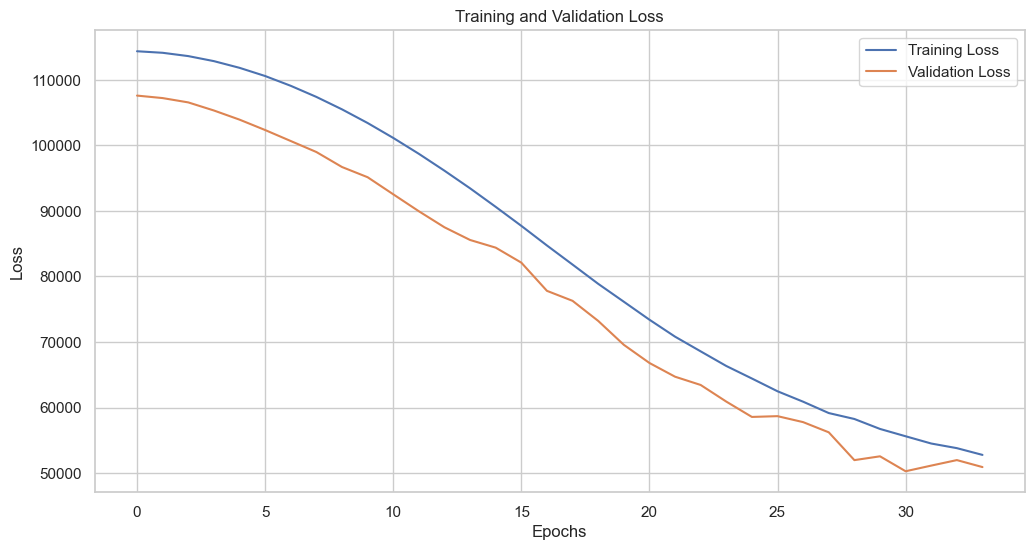

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming `data` is your DataFrame
X = data.drop(columns=['Tot_Mdcr_Alowd_Amt'])  # Input features
y = data['Tot_Mdcr_Alowd_Amt']  # Target column

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['number']).columns

# Convert mixed-type columns to string
for col in non_numeric_columns:
    X[col] = X[col].astype(str)

# Define preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
            ('scaler', RobustScaler())  # Scale numerical features to handle outliers
        ]), numeric_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
        ]), non_numeric_columns)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the ANN model with Batch Normalization, Dropout, and Leaky ReLU
def create_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        Dense(128, input_shape=(X_train_preprocessed.shape[1],)),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(64),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(32),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(1)  # For regression output
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error', metrics=['mae'])
    return model

# Define hyperparameters to try
learning_rates = [0.001, 0.01]
dropout_rates = [0.3, 0.5]

best_score = float('inf')  # Initialize best score as infinity for MAE minimization
best_model = None
best_params = {}

# Grid search for hyperparameter tuning
for lr in learning_rates:
    for dr in dropout_rates:
        print(f"Training with learning_rate={lr} and dropout_rate={dr}")
        model = create_model(learning_rate=lr, dropout_rate=dr)
        
        # Callback for early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Train the model
        history = model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=512, validation_split=0.2,
                            callbacks=[early_stopping], verbose=1)
        
        # Predict on the test set
        y_pred = model.predict(X_test_preprocessed).flatten()
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = history.history['val_mae'][-1]  # Get the last value of MAE from validation history
        
        print(f"MAE: {mae}, MSE: {mse}, R-squared: {r2}")
        
        if mae < best_score:
            best_score = mae
            best_model = model
            best_params = {'learning_rate': lr, 'dropout_rate': dr}

print(f"Best Parameters: {best_params}")
print(f"Best MAE: {best_score}")

# Plot the training and validation loss for the best model
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

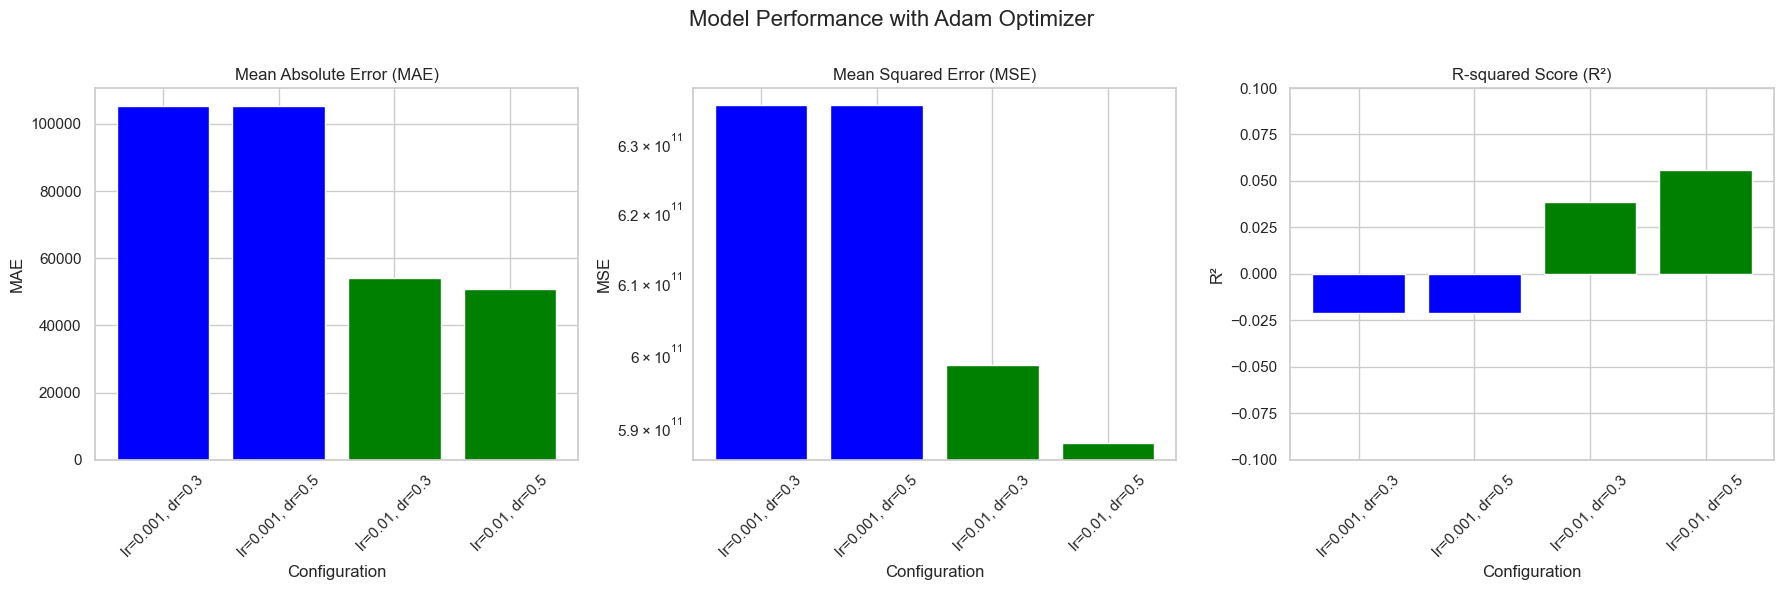

Best MAE: 50911.8828125 at configuration lr=0.01, dr=0.5
Best MSE: 587745453967.5618 at configuration lr=0.01, dr=0.5
Best R-squared: 0.05569380008177516 at configuration lr=0.01, dr=0.5


In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Results for different configurations using Adam optimizer
configurations = [
    'lr=0.001, dr=0.3',
    'lr=0.001, dr=0.5',
    'lr=0.01, dr=0.3',
    'lr=0.01, dr=0.5'
]
mae_values = [
    105382.9453125,
    105409.796875,
    54170.48046875,
    50911.8828125
]
mse_values = [
    635507311431.8636,
    635506618118.8811,
    598412836805.9395,
    587745453967.5618
]
r2_values = [
    -0.021043191788926663,
    -0.02104207787176504,
    0.03855495930779396,
    0.05569380008177516
]

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Mean Absolute Error
axs[0].bar(configurations, mae_values, color=['blue', 'blue', 'green', 'green'])
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('Configuration')
axs[0].tick_params(axis='x', rotation=45)

# Plot Mean Squared Error
axs[1].bar(configurations, mse_values, color=['blue', 'blue', 'green', 'green'])
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_yscale('log')  # Use log scale due to large range in values
axs[1].set_ylabel('MSE')
axs[1].set_xlabel('Configuration')
axs[1].tick_params(axis='x', rotation=45)

# Plot R-squared Score
axs[2].bar(configurations, r2_values, color=['blue', 'blue', 'green', 'green'])
axs[2].set_title('R-squared Score (R²)')
axs[2].set_ylim([-0.1, 0.1])  # Set y-axis limits for R² for better visualization
axs[2].set_ylabel('R²')
axs[2].set_xlabel('Configuration')
axs[2].tick_params(axis='x', rotation=45)

# Add a main title for the entire figure
fig.suptitle('Model Performance with Adam Optimizer', fontsize=16)

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust top to make space for the main title
plt.show()

# Print the best MAE, MSE, and R²
best_mae_index = np.argmin(mae_values)
best_mse_index = np.argmin(mse_values)
best_r2_index = np.argmax(r2_values)

print(f"Best MAE: {mae_values[best_mae_index]} at configuration {configurations[best_mae_index]}")
print(f"Best MSE: {mse_values[best_mse_index]} at configuration {configurations[best_mse_index]}")
print(f"Best R-squared: {r2_values[best_r2_index]} at configuration {configurations[best_r2_index]}")

## 2.RMSprop

Training with learning_rate=0.001 and dropout_rate=0.3


C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - loss: 110757.2812 - mae: 110757.2812 - val_loss: 107711.1875 - val_mae: 107711.1875
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - loss: 115724.0859 - mae: 115724.0859 - val_loss: 107708.9141 - val_mae: 107708.9141
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - loss: 112206.1484 - mae: 112206.1484 - val_loss: 107705.8828 - val_mae: 107705.8828
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - loss: 110472.0859 - mae: 110472.0859 - val_loss: 107701.3516 - val_mae: 107701.3516
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step - loss: 118277.7734 - mae: 118277.7734 - val_loss: 107696.0156 - val_mae: 107696.0156
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - loss: 115954.6641 - mae: 115954.6641 - val_loss: 107689.3594 - val_mae: 107689.3594
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - loss: 119382.5625 - mae: 119382.5625 - val_loss: 107681.2891 - val_mae: 107681.2891
Epoch 8/50
12

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - loss: 113745.8906 - mae: 113745.8906 - val_loss: 107710.9609 - val_mae: 107710.9609
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - loss: 118235.1797 - mae: 118235.1797 - val_loss: 107708.5703 - val_mae: 107708.5703
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - loss: 114999.9766 - mae: 114999.9766 - val_loss: 107705.2500 - val_mae: 107705.2500
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - loss: 111200.6094 - mae: 111200.6094 - val_loss: 107700.6484 - val_mae: 107700.6484
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - loss: 116925.4062 - mae: 116925.4062 - val_loss: 107695.2812 - val_mae: 107695.2812
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - loss: 113842.4453 - mae: 113842.4453 - val_loss: 107688.8047 - val_mae: 107688.8047
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - loss: 120166.0703 - mae: 120166.0703 - val_loss: 107681.0156 - val_mae: 107681.0156
Epoch 8/50
12

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 174ms/step - loss: 112475.2031 - mae: 112475.2031 - val_loss: 107626.7500 - val_mae: 107626.7500
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - loss: 115724.3203 - mae: 115724.3203 - val_loss: 107433.4453 - val_mae: 107433.4453
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 172ms/step - loss: 114691.6562 - mae: 114691.6562 - val_loss: 107124.2266 - val_mae: 107124.2266
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - loss: 114528.2188 - mae: 114528.2188 - val_loss: 106623.5859 - val_mae: 106623.5859
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - loss: 115669.5938 - mae: 115669.5938 - val_loss: 105980.1484 - val_mae: 105980.1484
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - loss: 114086.7188 - mae: 114086.7188 - val_loss: 105286.6250 - val_mae: 105286.6250
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - loss: 115687.2969 - mae: 115687.2969 - val_loss: 104629.9141 - val_mae: 104629.9141
Epoch 8/50
12

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 196ms/step - loss: 112439.0000 - mae: 112439.0000 - val_loss: 107626.0156 - val_mae: 107626.0156
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - loss: 111377.4844 - mae: 111377.4844 - val_loss: 107436.4688 - val_mae: 107436.4688
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 180ms/step - loss: 115864.4609 - mae: 115864.4609 - val_loss: 107140.1094 - val_mae: 107140.1094
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - loss: 114186.2656 - mae: 114186.2656 - val_loss: 106665.0859 - val_mae: 106665.0859
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 182ms/step - loss: 112403.7344 - mae: 112403.7344 - val_loss: 106048.9453 - val_mae: 106048.9453
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - loss: 112920.4453 - mae: 112920.4453 - val_loss: 105341.0234 - val_mae: 105341.0234
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - loss: 111940.2109 - mae: 111940.2109 - val_loss: 104548.6562 - val_mae: 104548.6562
Epoch 8/50
12

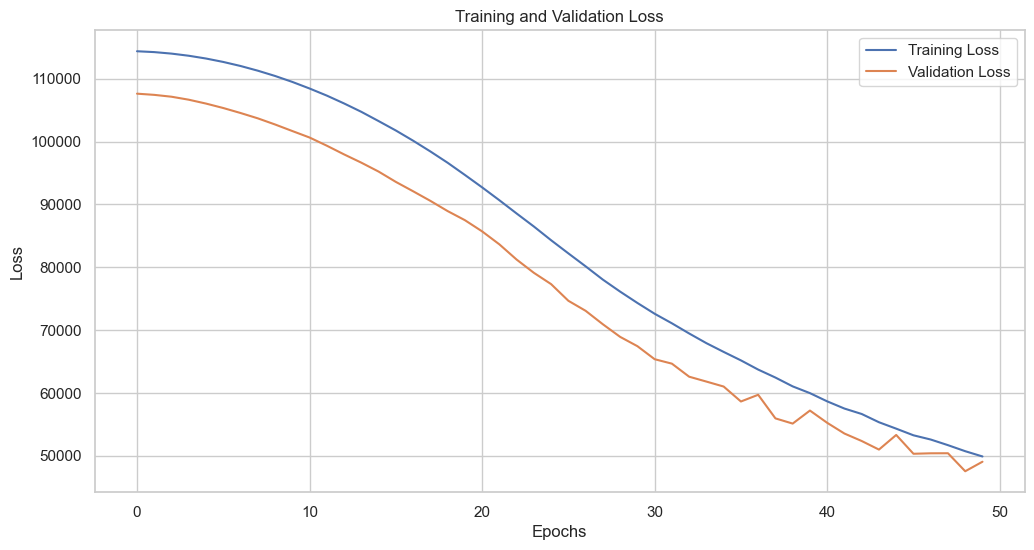

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Assuming `data` is your DataFrame
X = data.drop(columns=['Tot_Mdcr_Alowd_Amt'])  # Input features
y = data['Tot_Mdcr_Alowd_Amt']  # Target column

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['number']).columns

# Convert mixed-type columns to string
for col in non_numeric_columns:
    X[col] = X[col].astype(str)

# Define preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
            ('scaler', RobustScaler())  # Scale numerical features to handle outliers
        ]), numeric_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
        ]), non_numeric_columns)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the ANN model with Batch Normalization, Dropout, and Leaky ReLU
def create_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        Dense(128, input_shape=(X_train_preprocessed.shape[1],)),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(64),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(32),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(1)  # For regression output
    ])
    model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='mean_absolute_error', metrics=['mae'])
    return model

# Define hyperparameters to try
learning_rates = [0.001, 0.01]
dropout_rates = [0.3, 0.5]

best_score = float('inf')  # Initialize best score as infinity for MAE minimization
best_model = None
best_params = {}

# Grid search for hyperparameter tuning
for lr in learning_rates:
    for dr in dropout_rates:
        print(f"Training with learning_rate={lr} and dropout_rate={dr}")
        model = create_model(learning_rate=lr, dropout_rate=dr)
        
        # Callback for early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Train the model
        history = model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=512, validation_split=0.2,
                            callbacks=[early_stopping], verbose=1)
        
        # Predict on the test set
        y_pred = model.predict(X_test_preprocessed).flatten()
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = history.history['val_mae'][-1]  # Get the last value of MAE from validation history
        
        print(f"MAE: {mae}, MSE: {mse}, R-squared: {r2}")
        
        if mae < best_score:
            best_score = mae
            best_model = model
            best_params = {'learning_rate': lr, 'dropout_rate': dr}

print(f"Best Parameters: {best_params}")
print(f"Best MAE: {best_score}")

# Plot the training and validation loss for the best model
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

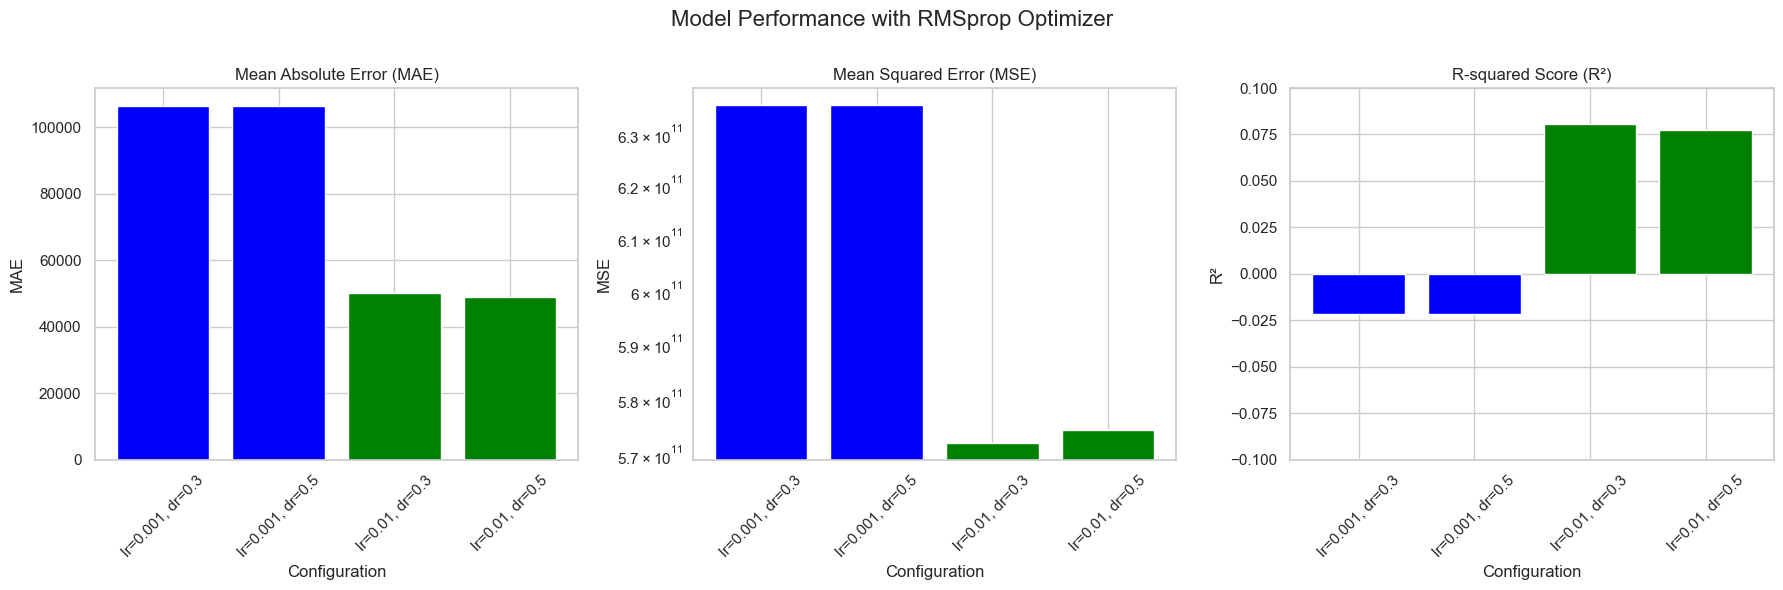

Best MAE: 49041.8203125 at configuration lr=0.01, dr=0.5
Best MSE: 572112475438.3943 at configuration lr=0.01, dr=0.3
Best R-squared: 0.08081065713039837 at configuration lr=0.01, dr=0.3


In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Results for different configurations using RMSprop optimizer
configurations = [
    'lr=0.001, dr=0.3',
    'lr=0.001, dr=0.5',
    'lr=0.01, dr=0.3',
    'lr=0.01, dr=0.5'
]
mae_values = [
    106444.578125,
    106344.21875,
    50130.76171875,
    49041.8203125
]
mse_values = [
    635711296304.2091,
    635733898080.2516,
    572112475438.3943,
    574345791388.9279
]
r2_values = [
    -0.02137092580770128,
    -0.021407239142159362,
    0.08081065713039837,
    0.07722248118751562
]

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Mean Absolute Error
axs[0].bar(configurations, mae_values, color=['blue', 'blue', 'green', 'green'])
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('Configuration')
axs[0].tick_params(axis='x', rotation=45)

# Plot Mean Squared Error
axs[1].bar(configurations, mse_values, color=['blue', 'blue', 'green', 'green'])
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_yscale('log')  # Use log scale due to large range in values
axs[1].set_ylabel('MSE')
axs[1].set_xlabel('Configuration')
axs[1].tick_params(axis='x', rotation=45)

# Plot R-squared Score
axs[2].bar(configurations, r2_values, color=['blue', 'blue', 'green', 'green'])
axs[2].set_title('R-squared Score (R²)')
axs[2].set_ylim([-0.1, 0.1])  # Set y-axis limits for R² for better visualization
axs[2].set_ylabel('R²')
axs[2].set_xlabel('Configuration')
axs[2].tick_params(axis='x', rotation=45)

# Add a main title for the entire figure
fig.suptitle('Model Performance with RMSprop Optimizer', fontsize=16)

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust top to make space for the main title
plt.show()

# Print the best MAE, MSE, and R²
best_mae_index = np.argmin(mae_values)
best_mse_index = np.argmin(mse_values)
best_r2_index = np.argmax(r2_values)

print(f"Best MAE: {mae_values[best_mae_index]} at configuration {configurations[best_mae_index]}")
print(f"Best MSE: {mse_values[best_mse_index]} at configuration {configurations[best_mse_index]}")
print(f"Best R-squared: {r2_values[best_r2_index]} at configuration {configurations[best_r2_index]}")

## 3. Adagrad

Training with learning_rate=0.001 and dropout_rate=0.3


C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - loss: 112623.1875 - mae: 112623.1875 - val_loss: 107712.1562 - val_mae: 107712.1562
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - loss: 114705.6484 - mae: 114705.6484 - val_loss: 107712.0234 - val_mae: 107712.0234
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - loss: 116158.0781 - mae: 116158.0781 - val_loss: 107711.9219 - val_mae: 107711.9219
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - loss: 117362.8438 - mae: 117362.8438 - val_loss: 107711.8438 - val_mae: 107711.8438
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - loss: 113743.8750 - mae: 113743.8750 - val_loss: 107711.7422 - val_mae: 107711.7422
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - loss: 115740.6953 - mae: 115740.6953 - val_loss: 107711.7109 - val_mae: 107711.7109
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - loss: 114799.6328 - mae: 114799.6328 - val_loss: 107711.6406 - val_mae: 107711.6406
Epoch 8/50
12

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - loss: 113556.1172 - mae: 113556.1172 - val_loss: 107711.5391 - val_mae: 107711.5391
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - loss: 113379.7891 - mae: 113379.7891 - val_loss: 107711.2031 - val_mae: 107711.2031
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - loss: 116265.8047 - mae: 116265.8047 - val_loss: 107711.1562 - val_mae: 107711.1562
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - loss: 112288.5703 - mae: 112288.5703 - val_loss: 107711.0703 - val_mae: 107711.0703
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - loss: 112057.6875 - mae: 112057.6875 - val_loss: 107711.0156 - val_mae: 107711.0156
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - loss: 115506.3984 - mae: 115506.3984 - val_loss: 107710.9922 - val_mae: 107710.9922
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - loss: 112960.3594 - mae: 112960.3594 - val_loss: 107710.9219 - val_mae: 107710.9219
Epoch 8/50
12

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 148ms/step - loss: 116066.2578 - mae: 116066.2578 - val_loss: 107709.7891 - val_mae: 107709.7891
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - loss: 121026.4297 - mae: 121026.4297 - val_loss: 107706.9609 - val_mae: 107706.9609
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - loss: 113085.6797 - mae: 113085.6797 - val_loss: 107703.5703 - val_mae: 107703.5703
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - loss: 112231.5859 - mae: 112231.5859 - val_loss: 107700.6875 - val_mae: 107700.6875
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - loss: 114186.8047 - mae: 114186.8047 - val_loss: 107697.7422 - val_mae: 107697.7422
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - loss: 117539.7109 - mae: 117539.7109 - val_loss: 107694.3438 - val_mae: 107694.3438
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - loss: 116744.9609 - mae: 116744.9609 - val_loss: 107690.9609 - val_mae: 107690.9609
Epoch 8/50
12

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - loss: 112692.7188 - mae: 112692.7188 - val_loss: 107709.8516 - val_mae: 107709.8516
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - loss: 113528.2344 - mae: 113528.2344 - val_loss: 107706.7969 - val_mae: 107706.7969
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 147ms/step - loss: 114017.1094 - mae: 114017.1094 - val_loss: 107703.6797 - val_mae: 107703.6797
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - loss: 111974.3906 - mae: 111974.3906 - val_loss: 107700.7344 - val_mae: 107700.7344
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - loss: 114977.1406 - mae: 114977.1406 - val_loss: 107697.6875 - val_mae: 107697.6875
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - loss: 118928.5312 - mae: 118928.5312 - val_loss: 107694.5469 - val_mae: 107694.5469
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 166ms/step - loss: 121769.5469 - mae: 121769.5469 - val_loss: 107691.1875 - val_mae: 107691.1875
Epoch 8/50
12

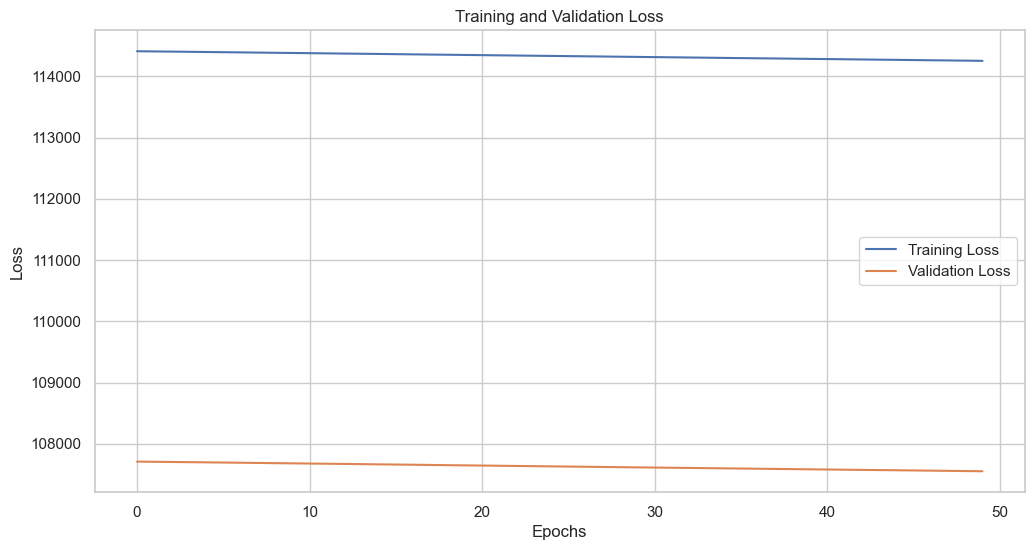

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.callbacks import EarlyStopping

# Assuming `data` is your DataFrame
X = data.drop(columns=['Tot_Mdcr_Alowd_Amt'])  # Input features
y = data['Tot_Mdcr_Alowd_Amt']  # Target column

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['number']).columns

# Convert mixed-type columns to string
for col in non_numeric_columns:
    X[col] = X[col].astype(str)

# Define preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
            ('scaler', RobustScaler())  # Scale numerical features to handle outliers
        ]), numeric_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
        ]), non_numeric_columns)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the ANN model with Batch Normalization, Dropout, and Leaky ReLU
def create_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        Dense(128, input_shape=(X_train_preprocessed.shape[1],)),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(64),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(32),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(1)  # For regression output
    ])
    model.compile(optimizer=Adagrad(learning_rate=learning_rate), loss='mean_absolute_error', metrics=['mae'])
    return model

# Define hyperparameters to try
learning_rates = [0.001, 0.01]
dropout_rates = [0.3, 0.5]

best_score = float('inf')  # Initialize best score as infinity for MAE minimization
best_model = None
best_params = {}

# Grid search for hyperparameter tuning
for lr in learning_rates:
    for dr in dropout_rates:
        print(f"Training with learning_rate={lr} and dropout_rate={dr}")
        model = create_model(learning_rate=lr, dropout_rate=dr)
        
        # Callback for early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Train the model
        history = model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=512, validation_split=0.2,
                            callbacks=[early_stopping], verbose=1)
        
        # Predict on the test set
        y_pred = model.predict(X_test_preprocessed).flatten()
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = history.history['val_mae'][-1]  # Get the last value of MAE from validation history
        
        print(f"MAE: {mae}, MSE: {mse}, R-squared: {r2}")
        
        if mae < best_score:
            best_score = mae
            best_model = model
            best_params = {'learning_rate': lr, 'dropout_rate': dr}

print(f"Best Parameters: {best_params}")
print(f"Best MAE: {best_score}")

# Plot the training and validation loss for the best model
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

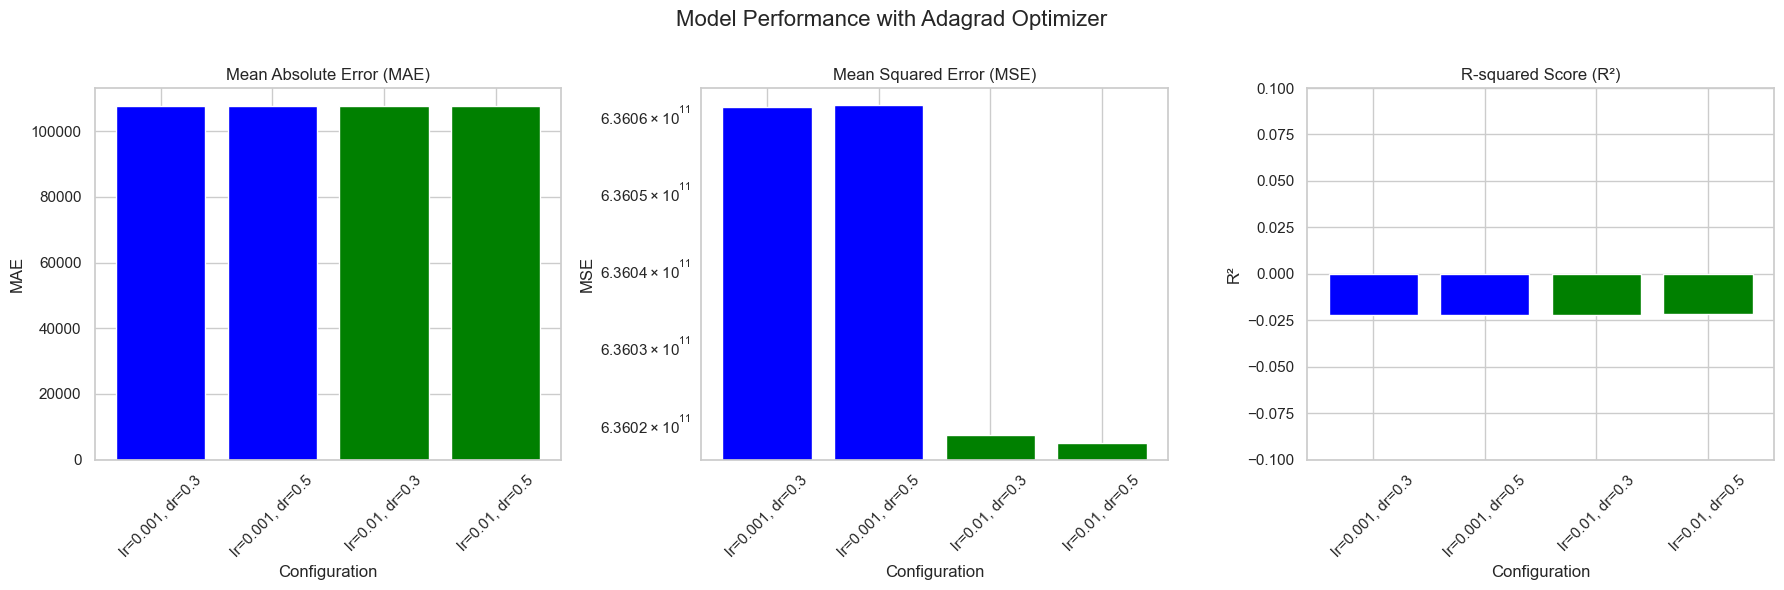

Best MAE: 107551.8046875 at configuration lr=0.01, dr=0.3
Best MSE: 636017498580.7992 at configuration lr=0.01, dr=0.5
Best R-squared: -0.021862888282716986 at configuration lr=0.01, dr=0.5


In [66]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adagrad

# Results for different configurations using Adagrad optimizer
configurations = [
    'lr=0.001, dr=0.3',
    'lr=0.001, dr=0.5',
    'lr=0.01, dr=0.3',
    'lr=0.01, dr=0.5'
]
mae_values = [
    107709.4921875,
    107708.9375,
    107551.8046875,
    107552.3203125
]
mse_values = [
    636060903842.3008,
    636061216741.227,
    636018512075.335,
    636017498580.7992
]
r2_values = [
    -0.021932625712872245,
    -0.021933128434576066,
    -0.02186451662227662,
    -0.021862888282716986
]

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Mean Absolute Error
axs[0].bar(configurations, mae_values, color=['blue', 'blue', 'green', 'green'])
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('Configuration')
axs[0].tick_params(axis='x', rotation=45)

# Plot Mean Squared Error
axs[1].bar(configurations, mse_values, color=['blue', 'blue', 'green', 'green'])
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_yscale('log')  # Use log scale due to large range in values
axs[1].set_ylabel('MSE')
axs[1].set_xlabel('Configuration')
axs[1].tick_params(axis='x', rotation=45)

# Plot R-squared Score
axs[2].bar(configurations, r2_values, color=['blue', 'blue', 'green', 'green'])
axs[2].set_title('R-squared Score (R²)')
axs[2].set_ylim([-0.1, 0.1])  # Set y-axis limits for R² for better visualization
axs[2].set_ylabel('R²')
axs[2].set_xlabel('Configuration')
axs[2].tick_params(axis='x', rotation=45)

# Add a main title for the entire figure
fig.suptitle('Model Performance with Adagrad Optimizer', fontsize=16)

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust top to make space for the main title
plt.show()

# Print the best MAE, MSE, and R²
best_mae_index = np.argmin(mae_values)
best_mse_index = np.argmin(mse_values)
best_r2_index = np.argmax(r2_values)

print(f"Best MAE: {mae_values[best_mae_index]} at configuration {configurations[best_mae_index]}")
print(f"Best MSE: {mse_values[best_mse_index]} at configuration {configurations[best_mse_index]}")
print(f"Best R-squared: {r2_values[best_r2_index]} at configuration {configurations[best_r2_index]}")

## 4. SGD

Training with learning_rate=0.001 and dropout_rate=0.3


C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - loss: 115001.7188 - mae: 115001.7188 - val_loss: 107712.2500 - val_mae: 107712.2500
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 116723.2422 - mae: 116723.2422 - val_loss: 107711.7812 - val_mae: 107711.7812
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 112924.4297 - mae: 112924.4297 - val_loss: 107711.3750 - val_mae: 107711.3750
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 115873.0000 - mae: 115873.0000 - val_loss: 107710.9141 - val_mae: 107710.9141
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 115064.7969 - mae: 115064.7969 - val_loss: 107710.4297 - val_mae: 107710.4297
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 111148.6328 - mae: 111148.6328 - val_loss: 107709.8438 - val_mae: 107709.8438
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 113622.3516 - mae: 113622.3516 - val_loss: 107709.1094 - val_mae: 107709.1094
Epoch 8/50
125/125 ━━━━━

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - loss: 113934.1094 - mae: 113934.1094 - val_loss: 107712.6016 - val_mae: 107712.6016
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 111625.7109 - mae: 111625.7109 - val_loss: 107712.5078 - val_mae: 107712.5078
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 115276.7734 - mae: 115276.7734 - val_loss: 107712.1328 - val_mae: 107712.1328
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 115373.1484 - mae: 115373.1484 - val_loss: 107711.6328 - val_mae: 107711.6328
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 112237.9922 - mae: 112237.9922 - val_loss: 107711.2500 - val_mae: 107711.2500
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 112733.9844 - mae: 112733.9844 - val_loss: 107710.7109 - val_mae: 107710.7109
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 113911.4062 - mae: 113911.4062 - val_loss: 107710.0547 - val_mae: 107710.0547
Epoch 8/50
125/125 ━━━━━━━

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 113480.9688 - mae: 113480.9688 - val_loss: 107706.2500 - val_mae: 107706.2500
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 113447.4922 - mae: 113447.4922 - val_loss: 107648.2500 - val_mae: 107648.2500
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 114669.8984 - mae: 114669.8984 - val_loss: 106960.0781 - val_mae: 106960.0781
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 110208.8438 - mae: 110208.8438 - val_loss: 101252.8750 - val_mae: 101252.8750
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 108151.1094 - mae: 108151.1094 - val_loss: 89310.4219 - val_mae: 89310.4219
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 86916.3516 - mae: 86916.3516 - val_loss: 94289.6172 - val_mae: 94289.6172
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 70958.2891 - mae: 70958.2891 - val_loss: 88556.5625 - val_mae: 88556.5625
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 114371.7188 - mae: 114371.7188 - val_loss: 107705.6484 - val_mae: 107705.6484
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 109887.1797 - mae: 109887.1797 - val_loss: 107644.3906 - val_mae: 107644.3906
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 116471.6328 - mae: 116471.6328 - val_loss: 106924.7031 - val_mae: 106924.7031
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 110867.9375 - mae: 110867.9375 - val_loss: 100845.7891 - val_mae: 100845.7891
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 106532.1328 - mae: 106532.1328 - val_loss: 89831.6172 - val_mae: 89831.6172
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 88590.9766 - mae: 88590.9766 - val_loss: 94297.2656 - val_mae: 94297.2656
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 76807.5781 - mae: 76807.5781 - val_loss: 89756.8438 - val_mae: 89756.8438
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━

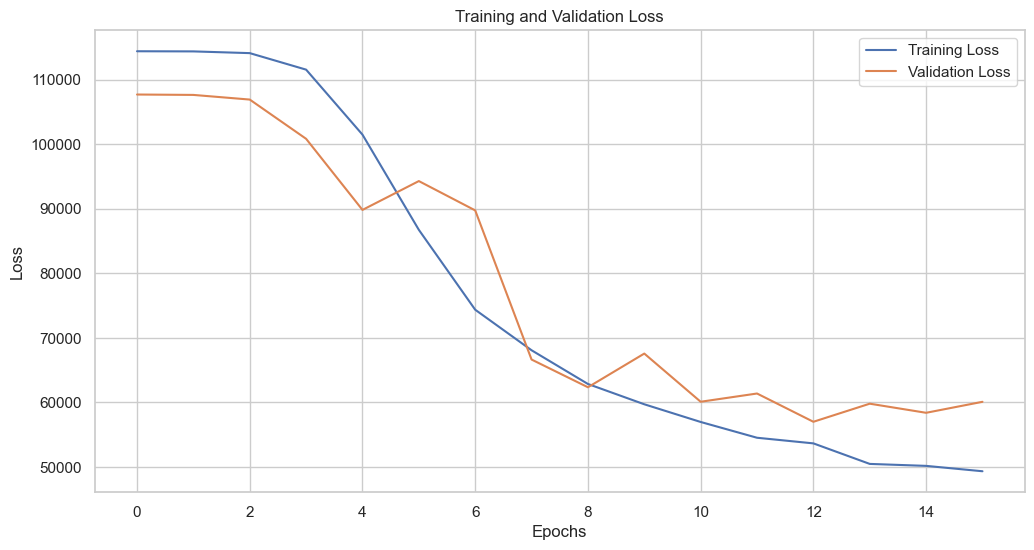

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Assuming `data` is your DataFrame
X = data.drop(columns=['Tot_Mdcr_Alowd_Amt'])  # Input features
y = data['Tot_Mdcr_Alowd_Amt']  # Target column

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['number']).columns

# Convert mixed-type columns to string
for col in non_numeric_columns:
    X[col] = X[col].astype(str)

# Define preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
            ('scaler', RobustScaler())  # Scale numerical features to handle outliers
        ]), numeric_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
        ]), non_numeric_columns)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the ANN model with Batch Normalization, Dropout, and Leaky ReLU
def create_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        Dense(128, input_shape=(X_train_preprocessed.shape[1],)),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(64),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(32),
        LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(1)  # For regression output
    ])
    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='mean_absolute_error', metrics=['mae'])
    return model

# Define hyperparameters to try
learning_rates = [0.001, 0.01]
dropout_rates = [0.3, 0.5]

best_score = float('inf')  # Initialize best score as infinity for MAE minimization
best_model = None
best_params = {}

# Grid search for hyperparameter tuning
for lr in learning_rates:
    for dr in dropout_rates:
        print(f"Training with learning_rate={lr} and dropout_rate={dr}")
        model = create_model(learning_rate=lr, dropout_rate=dr)
        
        # Callback for early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Train the model
        history = model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=512, validation_split=0.2,
                            callbacks=[early_stopping], verbose=1)
        
        # Predict on the test set
        y_pred = model.predict(X_test_preprocessed).flatten()
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = history.history['val_mae'][-1]  # Get the last value of MAE from validation history
        
        print(f"MAE: {mae}, MSE: {mse}, R-squared: {r2}")
        
        if mae < best_score:
            best_score = mae
            best_model = model
            best_params = {'learning_rate': lr, 'dropout_rate': dr}

print(f"Best Parameters: {best_params}")
print(f"Best MAE: {best_score}")

# Plot the training and validation loss for the best model
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

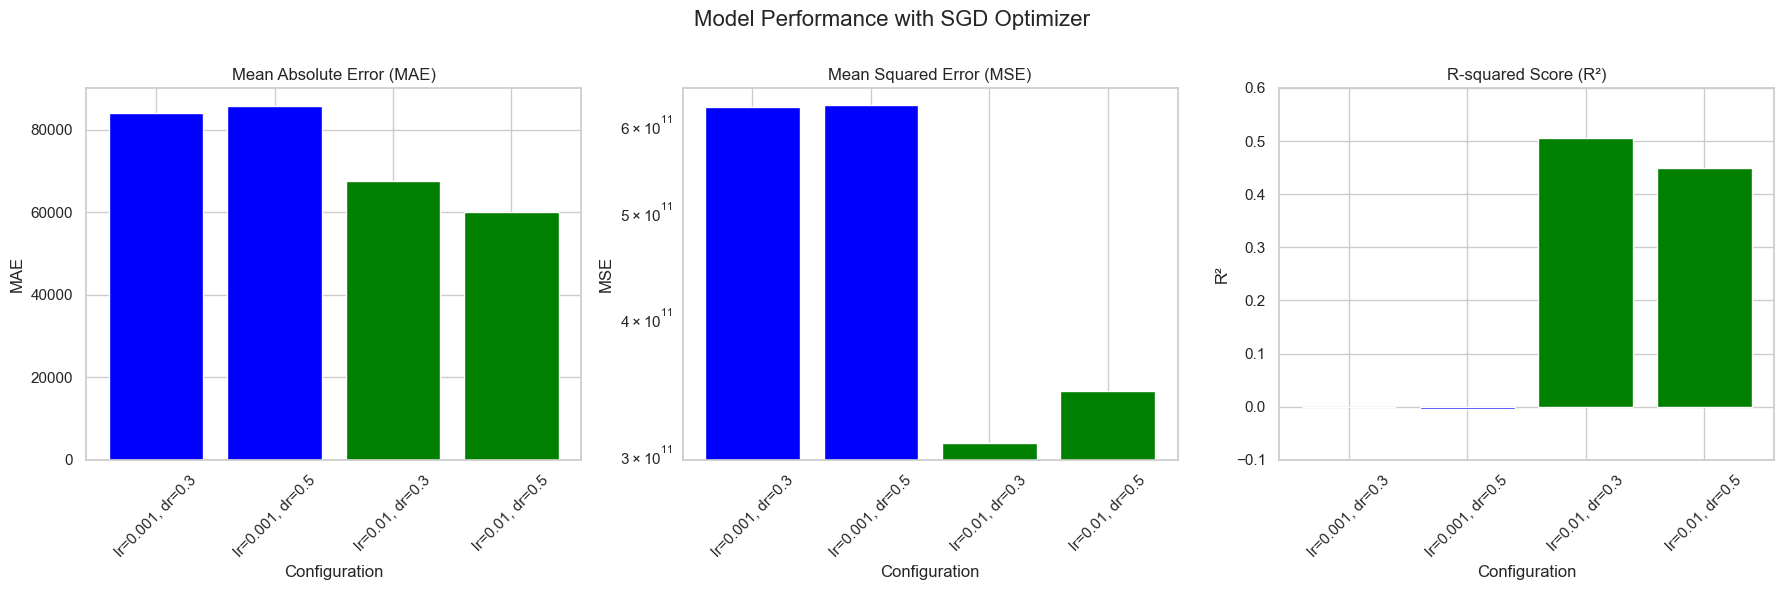

Best MAE: 60107.52734375 at configuration lr=0.01, dr=0.5
Best MSE: 307436351801.65765 at configuration lr=0.01, dr=0.3
Best R-squared: 0.5060547876180281 at configuration lr=0.01, dr=0.3


In [67]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD

# Results for different configurations using SGD optimizer
configurations = [
    'lr=0.001, dr=0.3',
    'lr=0.001, dr=0.5',
    'lr=0.01, dr=0.3',
    'lr=0.01, dr=0.5'
]
mae_values = [
    84196.0703125,
    85877.7734375,
    67670.0078125,
    60107.52734375
]
mse_values = [
    623205306272.9775,
    625779901611.4836,
    307436351801.65765,
    342680927646.0364
]
r2_values = [
    -0.0012780712515534365,
    -0.005414566606847027,
    0.5060547876180281,
    0.44942879202985675
]

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Mean Absolute Error
axs[0].bar(configurations, mae_values, color=['blue', 'blue', 'green', 'green'])
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('Configuration')
axs[0].tick_params(axis='x', rotation=45)

# Plot Mean Squared Error
axs[1].bar(configurations, mse_values, color=['blue', 'blue', 'green', 'green'])
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_yscale('log')  # Use log scale due to large range in values
axs[1].set_ylabel('MSE')
axs[1].set_xlabel('Configuration')
axs[1].tick_params(axis='x', rotation=45)

# Plot R-squared Score
axs[2].bar(configurations, r2_values, color=['blue', 'blue', 'green', 'green'])
axs[2].set_title('R-squared Score (R²)')
axs[2].set_ylim([-0.1, 0.6])  # Set y-axis limits for R² for better visualization
axs[2].set_ylabel('R²')
axs[2].set_xlabel('Configuration')
axs[2].tick_params(axis='x', rotation=45)

# Add a main title for the entire figure
fig.suptitle('Model Performance with SGD Optimizer', fontsize=16)

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust top to make space for the main title
plt.show()

# Print the best MAE, MSE, and R²
best_mae_index = np.argmin(mae_values)
best_mse_index = np.argmin(mse_values)
best_r2_index = np.argmax(r2_values)

print(f"Best MAE: {mae_values[best_mae_index]} at configuration {configurations[best_mae_index]}")
print(f"Best MSE: {mse_values[best_mse_index]} at configuration {configurations[best_mse_index]}")
print(f"Best R-squared: {r2_values[best_r2_index]} at configuration {configurations[best_r2_index]}")

## ML VS ANN

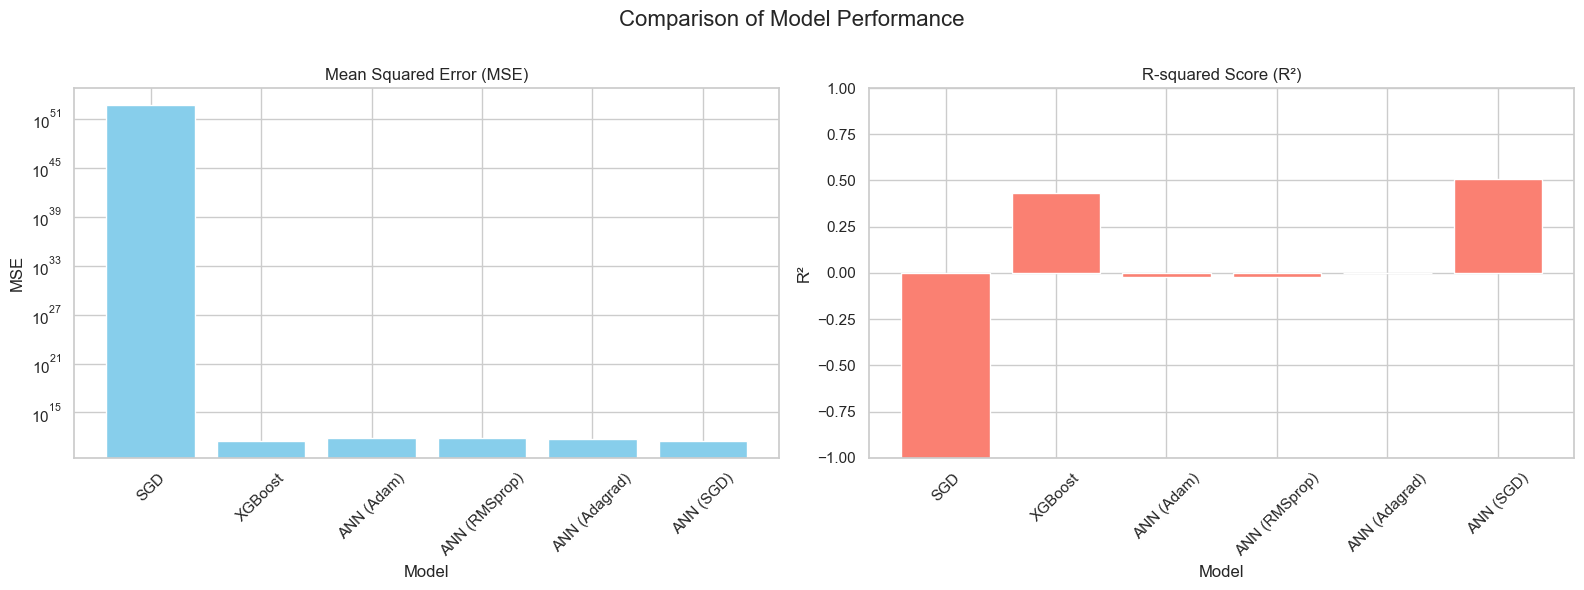

Best MSE: 307436351801.65765 at model ANN (SGD)
Best R-squared: 0.5060547876180281 at model ANN (SGD)
Best Optimizer based on MSE: SGD
Best Optimizer based on R-squared: SGD


In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
# Traditional Machine Learning Models
sgd_mse = 5.669711683968661e+52
sgd_r2 = -9.109290184685793e+40

xgb_mse = 352018173293.1132
xgb_r2 = 0.4344270274136036

# ANN Models with Different Optimizers
ann_adam_mse = 635507311431.8636
ann_adam_r2 = -0.021043191788926663

ann_rmsprop_mse = 636060903842.3008
ann_rmsprop_r2 = -0.021932625712872245

ann_adagrad_mse = 623205306272.9775
ann_adagrad_r2 = -0.0012780712515534365

ann_sgd_mse = 307436351801.65765
ann_sgd_r2 = 0.5060547876180281

# Optimizer names for ANN models
optimizers = ['Adam', 'RMSprop', 'Adagrad', 'SGD']

# Collect MSE and R-squared for ANN models
ann_mse_values = [ann_adam_mse, ann_rmsprop_mse, ann_adagrad_mse, ann_sgd_mse]
ann_r2_values = [ann_adam_r2, ann_rmsprop_r2, ann_adagrad_r2, ann_sgd_r2]

# Determine best optimizer based on MSE and R-squared
best_ann_mse_index = np.argmin(ann_mse_values)
best_ann_r2_index = np.argmax(ann_r2_values)

best_ann_mse_optimizer = optimizers[best_ann_mse_index]
best_ann_r2_optimizer = optimizers[best_ann_r2_index]

# Create a figure with two subplots for comparison
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot Mean Squared Error
models = ['SGD', 'XGBoost', 'ANN (Adam)', 'ANN (RMSprop)', 'ANN (Adagrad)', 'ANN (SGD)']
mse_values = [sgd_mse, xgb_mse] + ann_mse_values
axs[0].bar(models, mse_values, color='skyblue')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_yscale('log')  # Use log scale for better visualization
axs[0].set_ylabel('MSE')
axs[0].set_xlabel('Model')
axs[0].tick_params(axis='x', rotation=45)

# Plot R-squared Score
r2_values = [sgd_r2, xgb_r2] + ann_r2_values
axs[1].bar(models, r2_values, color='salmon')
axs[1].set_title('R-squared Score (R²)')
axs[1].set_ylim([-1, 1])  # Set y-axis limits for R² for better visualization
axs[1].set_ylabel('R²')
axs[1].set_xlabel('Model')
axs[1].tick_params(axis='x', rotation=45)

# Add a main title for the entire figure
fig.suptitle('Comparison of Model Performance', fontsize=16)

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust top to make space for the main title
plt.show()

# Print best metrics and optimizers
print(f"Best MSE: {mse_values[np.argmin(mse_values)]} at model {models[np.argmin(mse_values)]}")
print(f"Best R-squared: {r2_values[np.argmax(r2_values)]} at model {models[np.argmax(r2_values)]}")
print(f"Best Optimizer based on MSE: {best_ann_mse_optimizer}")
print(f"Best Optimizer based on R-squared: {best_ann_r2_optimizer}")